In [ ]:
import scanpy
print('scanpy.__version__:',scanpy.__version__)
import anndata
print('anndata.__version__:',anndata.__version__)


import scanpy as sc 
# 导入我们封装好的工具
from remote_conda_decorator import wrap, SmartAnnData

# ==========================================
# 1. 准备数据 (在主环境中)
# ==========================================
print("Loading data in Host Environment...")
adata = sc.read('./data/adata_st.h5ad')
sc.pp.filter_genes(adata, min_cells=3)
print(f"Data shape: {adata.shape}")

/opt/conda/envs/scOmni/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


scanpy.__version__: 1.11.2
anndata.__version__: 0.11.4
Loading data in Host Environment...
Data shape: (324, 15100)


Loading data in Host Environment...
Data shape: (324, 15100)

🚀 Starting remote task...
⏳ [Subprocess] Launching 'stlearn' env...
[stlearn] 🎨 [Remote] Graphics redirection enabled.
[stlearn] 🚀 [Remote] Executing function: run_stlearn_kmeans_clustering (Memory Mode)
[stlearn] /opt/conda/envs/stlearn/lib/python3.12/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
[stlearn] from pkg_resources import get_distribution, DistributionNotFound
[stlearn] --> [Remote Env] Processing AnnData with shape: (324, 15100)
[stlearn] PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
[stlearn] 2025-12-12 08:01:38.359687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
[stle

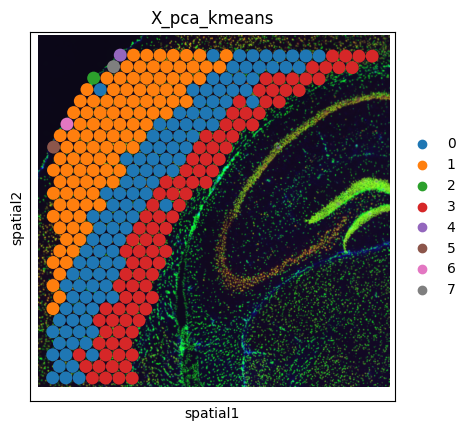

In [ ]:
# ==========================================
# 2. 定义远程任务函数
# ==========================================
# 使用 @wrap 装饰器，指定要运行的 conda 环境名称
# 注意：这个函数内部引用的包（如 stlearn）必须在那个 conda 环境里已安装
@wrap("stlearn")
def run_stlearn_kmeans_clustering(adata, n_clusters=7):
    """
    使用 stlearn 对空间转录组数据进行 KMeans 聚类分析。
    参数
    ----
    adata : AnnData 输入的 AnnData 对象，包含空间转录组数据。
    n_clusters : int, 默认=7,KMeans 聚类的簇数。

    返回
    ----
    adata_raw : AnnData
        返回一个复制的 AnnData，其中包含聚类结果保存在 .obs['X_pca_kmeans']。
    """
    import stlearn as st
    import scanpy as sc
    adata_raw = adata.copy()
    print(f"--> [Remote Env] Processing AnnData with shape: {adata.shape}")
    sc.pp.filter_genes(adata, min_cells=3)
    # 模拟 stlearn 的一些预处理
    #st.pp.normalize_total(adata)
    #st.pp.log1p(adata)
    st.em.run_pca(adata, n_comps=50)
    st.pp.neighbors(adata)
    # 聚类
    st.tl.clustering.kmeans(adata, n_clusters=n_clusters, use_data="X_pca", key_added="X_pca_kmeans")
    # 返回处理后的 AnnData
    adata_raw.obs['X_pca_kmeans'] = adata.obs['X_pca_kmeans']
    sc.pl.spatial(adata, color=['X_pca_kmeans'],size=1.5)
    return adata_raw

adata = run_stlearn_kmeans_clustering(adata, n_clusters=8)

⏳ [Subprocess] Launching 'stlearn' env...
[stlearn] 🎨 [Remote] Graphics redirection enabled.
[stlearn] 🚀 [Remote] Executing function: run_stlearn_trajectory (Memory Mode)
[stlearn] /opt/conda/envs/stlearn/lib/python3.12/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
[stlearn] from pkg_resources import get_distribution, DistributionNotFound
[stlearn] --- Starting Trajectory Analysis (Root: 0, Label: X_pca_kmeans) ---
[stlearn] All available trajectory paths are stored in adata.uns['available_paths'] with length < 4 nodes
[stlearn] 
[stlearn] === Available Paths Summary (Total: 34) ===
[stlearn] Index [0] |Path Key: 0_0_1 | Steps: 2 | Path value: ['0', '1']
[stlearn] Index [1] |Path Key: 0_0_3 | Steps: 3 | Path value: ['0', '1', '3']
[stlearn] Index [2] |Path

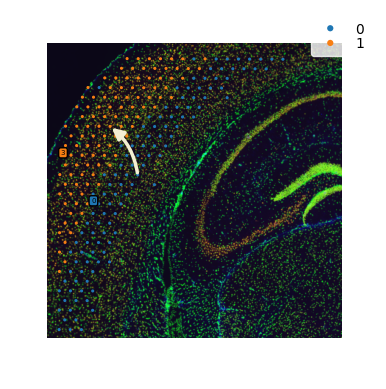

AnnData object with n_obs × n_vars = 324 × 15100
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster', 'louvain', 'imagecol', 'imagerow', 'tile_path', 'louvain_morphology', 'X_pca_kmeans', 'sub_cluster_labels', 'dpt_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'louvain_morphology_colors', 'neighbors', 'pca', 'spatial',

In [13]:
@wrap("stlearn")
def run_stlearn_trajectory(adata, 
                           root_cluster="0", 
                           use_label="louvain", 
                           eps=50, 
                           use_rep="X_pca", 
                           path_index=0):
    """
    运行 stLearn 轨迹分析：设置根节点 -> 计算伪时间 -> 过滤路径 -> 打印摘要 -> 绘图。
    
    参数:
        adata: AnnData 对象
        root_cluster (str): 根节点聚类编号 (默认 "0")
        use_label (str): 聚类列名 (默认 "louvain")
        eps (int): 伪时间计算参数 (默认 50)
        use_rep (str): 特征表示 (默认 "X_pca")
        path_index (int): 选择第几条路径进行可视化 (默认 0)
    """
    import stlearn as st
    import matplotlib.pyplot as plt
    print(f"--- Starting Trajectory Analysis (Root: {root_cluster}, Label: {use_label}) ---")

    # 1. 设置根节点
    adata.uns["iroot"] = st.spatial.trajectory.set_root(
        adata, use_label=use_label, cluster=root_cluster, use_raw=True
    )

    # 2. 计算伪时间
    st.spatial.trajectory.pseudotime(
        adata, eps=eps, use_rep=use_rep, use_label=use_label
    )

    # 3. 路径清洗与过滤 (只保留长度 > 1 的路径)
    # 注意：这里直接修改了 adata.uns['available_paths']
    if 'available_paths' in adata.uns:
        adata.uns['available_paths'] = {
            k: [str(x) for x in v] 
            for k, v in adata.uns['available_paths'].items() 
            if len(v) > 1
        }
    
    paths = adata.uns.get('available_paths', {})

    # 4. 打印路径摘要
    print(f"\n=== Available Paths Summary (Total: {len(paths)}) ===")
    if len(paths) == 0:
        print(">> Warning: 过滤后没有符合条件的路径 (len > 1)。")
        print("=" * 45)
        return adata # 提前结束，避免后面报错

    for i, (key, path) in enumerate(paths.items()):
        print(f"Index [{i}] |Path Key: {key} | Steps: {len(path)} | Path value: {path}")
    print("=" * 45)

    # 5. 选择路径并可视化
    # 获取所有路径的 value 列表
    all_path_values = list(paths.values())

    if path_index < len(all_path_values):
        chosen_paths = all_path_values[path_index]
        print(f"Selected Path Index [{path_index}]: {chosen_paths}")
        
        # 计算全局伪时间空间
        st.spatial.trajectory.pseudotimespace_global(
            adata, use_label=use_label, list_clusters=chosen_paths
        )
        
        # 绘图
        st.pl.cluster_plot(
            adata, 
            use_label=use_label, 
            show_trajectories=True, 
            list_clusters=chosen_paths, 
            show_subcluster=True
        )
        plt.show();
    else:
        print(f"Error: 指定的 path_index ({path_index}) 超出了可用路径数量 ({len(all_path_values)})。")
        print("请检查上方打印的 'Index' 并重新调用函数。")
    return adata

run_stlearn_trajectory(adata, root_cluster="0", use_label="X_pca_kmeans", eps=50, use_rep="X_pca", path_index=0)

⏳ [Subprocess] Launching 'stlearn' env...
[stlearn] 🎨 [Remote] Graphics redirection enabled.
[stlearn] 🚀 [Remote] Executing function: run_stlearn_cci (Memory Mode)
[stlearn] /opt/conda/envs/stlearn/lib/python3.12/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
[stlearn] from pkg_resources import get_distribution, DistributionNotFound
[stlearn] --- Starting CCI Analysis (Species: mouse, DB: connectomeDB2020_lit) ---
[stlearn] Loading LR database: connectomeDB2020_lit...
[stlearn] Running permutation test (n_pairs=1000)... This may take a while.
[stlearn] Calculating neighbours...
[stlearn] 0 spots with no neighbours, 6 median spot neighbours.
[stlearn] Spot neighbour indices stored in adata.obsm['spot_neighbours'] & adata.obsm['spot_neigh_bcs'].
[stlearn] Alt

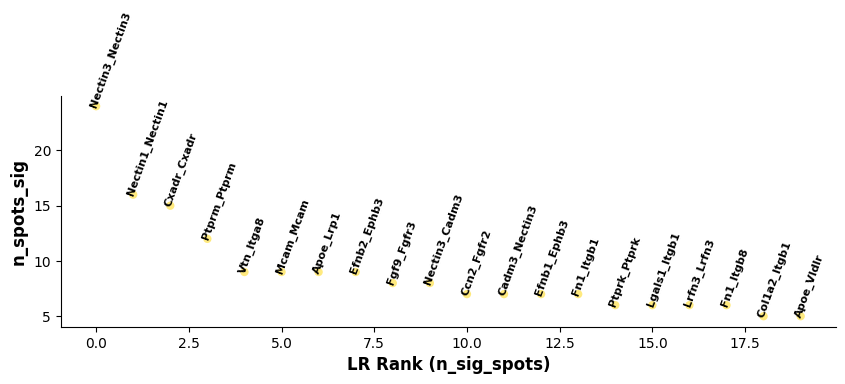

In [3]:
@wrap("stlearn")
def run_stlearn_cci(adata, 
                    lrs=None, 
                    species='human', 
                    database='connectomeDB2020_lit', 
                    min_spots=20, 
                    distance=None, 
                    n_pairs=100, 
                    n_cpus=None, 
                    pval_adj_cutoff=0.05, 
                    n_top_plot=50, 
                    figsize=(10, 3)):
    """
    封装 stLearn 的细胞通讯(CCI)分析流程：加载LR库 -> 运行置换检验 -> 校正P值 -> 绘图。
    
    参数:
        adata: AnnData 对象
        lrs: (可选) 已加载的配体-受体列表。如果为 None，则根据 database 和 species 自动加载。
        species: (str) 物种，例如 'human' 或 'mouse' (默认 'human')
        database: (str) 使用的数据库名称 (默认 'connectomeDB2020_lit')
        min_spots: (int) 过滤阈值，少于该 spot 数量的 LR 对将被忽略 (默认 20)
        distance: (int/None) 邻域距离。None=邻居模式, 0=单点模式 (默认 None)
        n_pairs: (int) 用于背景生成的随机对数量。建议正式跑设为 10,000 (默认 100)
        n_cpus: (int/None) 并行核心数。None 表示使用所有可用核心
        pval_adj_cutoff: (float) P 值校正阈值 (默认 0.05)
        n_top_plot: (int) 绘图显示的 Top LR 对数量 (默认 50)
        figsize: (tuple) 图片大小 (默认 (10, 3))
    """
    import stlearn as st
    import matplotlib.pyplot as plt
    
    print(f"--- Starting CCI Analysis (Species: {species}, DB: {database}) ---")

    # 1. 加载配体-受体库 (如果未提供)
    if lrs is None:
        print(f"Loading LR database: {database}...")
        lrs = st.tl.cci.load_lrs([database], species=species)
    else:
        print("Using provided LR database object.")

    # 2. 运行 CCI (Run Interaction Analysis)
    print(f"Running permutation test (n_pairs={n_pairs})... This may take a while.")
    st.tl.cci.run(
        adata, 
        lrs,
        min_spots=min_spots, 
        distance=distance, 
        n_pairs=n_pairs, 
        n_cpus=n_cpus
    )

    # 3. P值校正 (Adjust P-values)
    print("Adjusting P-values (FDR Benjamini-Hochberg)...")
    st.tl.cci.adj_pvals(
        adata, 
        correct_axis='spot', 
        pval_adj_cutoff=pval_adj_cutoff, 
        adj_method='fdr_bh'
    )

    # 4. 绘图 (Plot Summary)
    print(f"Plotting top {n_top_plot} LR pairs...")
    
    # 显式设置 figsize，防止图片显示不全或太小
    # stLearn 的 lr_summary 可能不直接接受 rcParams，但 figsize 参数通常有效
    st.pl.lr_summary(adata, n_top=n_top_plot, figsize=figsize)
    return adata

adata=run_stlearn_cci(adata, n_pairs=1000, n_top_plot=20,species='mouse')

⏳ [Subprocess] Launching 'stlearn' env...
[stlearn] 🎨 [Remote] Graphics redirection enabled.
[stlearn] 🚀 [Remote] Executing function: plot_lr_result (Memory Mode)
[stlearn] /opt/conda/envs/stlearn/lib/python3.12/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
[stlearn] from pkg_resources import get_distribution, DistributionNotFound
[stlearn] --- Plotting results for: Nectin3_Nectin3 ---


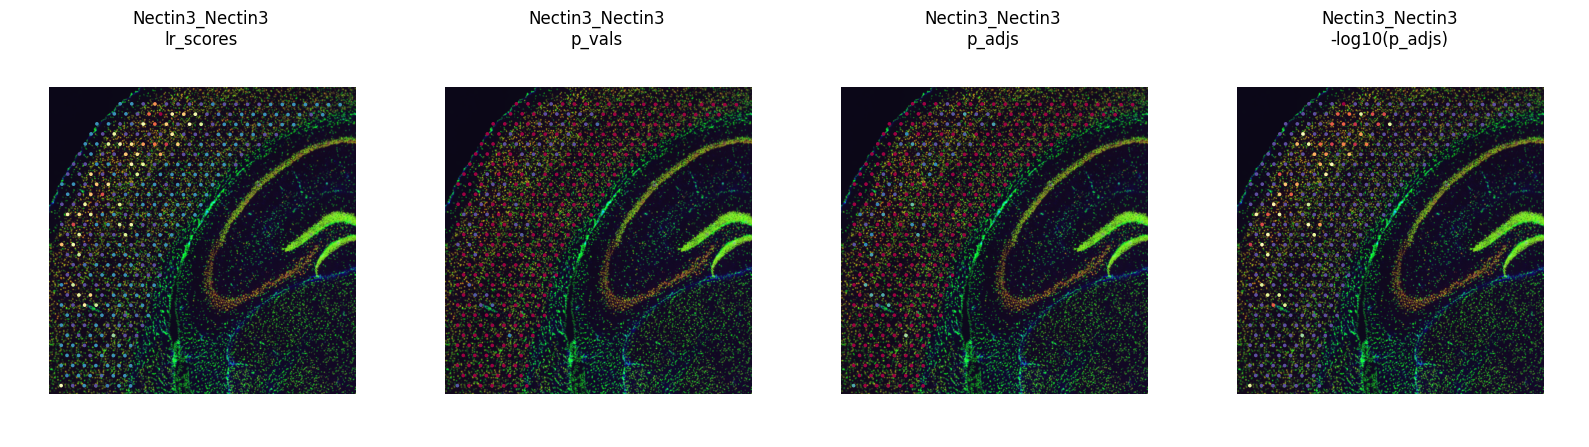

In [4]:
@wrap("stlearn")
def plot_lr_result(adata, 
                   use_lr, 
                   stats=['lr_scores', 'p_vals', 'p_adjs', '-log10(p_adjs)'], 
                   figsize=(16, 6)):
    """
    可视化特定 LR 配对（Ligand-Receptor Pair）的各项统计指标空间分布。
    
    参数:
        adata: AnnData 对象
        use_lr (str): 要可视化的 LR pair 名称 (例如 'EGFR_TGFB1')
        stats (list): 要展示的统计指标列表
        figsize (tuple): 图片大小
    """
    import matplotlib.pyplot as plt
    import stlearn as st
    # 动态创建子图
    n_cols = len(stats)
    fig, axes = plt.subplots(ncols=n_cols, figsize=figsize)
    
    # 如果只有 1 列，axes 不是列表，需要手动包一层，防止 enumerate 报错
    if n_cols == 1:
        axes = [axes]
    
    print(f"--- Plotting results for: {use_lr} ---")

    for i, stat in enumerate(stats):
        # 核心绘图逻辑
        st.pl.lr_result_plot(
            adata, 
            use_result=stat, 
            use_lr=use_lr, 
            show_color_bar=False, 
            ax=axes[i]
        )
        # 设置标题
        axes[i].set_title(f'{use_lr}\n{stat}')
    
    # 自动调整布局，避免标题重叠
    plt.tight_layout()
    plt.show()

best_lr = adata.uns['lr_summary'].index.values[0]
plot_lr_result(adata, use_lr=best_lr)